In [86]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns 
import datetime as dt

%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

### Data

In [87]:
co2_df = pd.read_csv(os.path.join("..", "data","lookups","pollution_CO2_EU.csv"))
so2_df = pd.read_csv(os.path.join("..", "data","lookups","pollution_SO2.csv"))
energy_coal_df = pd.read_csv(os.path.join("..", "data","processed","energy_gross_inland_deliveries_coal_all.csv"))


In [88]:
energy_coal_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 429 entries, 0 to 428
Data columns (total 5 columns):
Country    429 non-null object
GDP        429 non-null float64
Date       429 non-null object
Value      400 non-null float64
Unit       429 non-null object
dtypes: float64(2), object(3)
memory usage: 16.9+ KB


In [89]:
co2_df.head()

,Country,Date,COCL,COEM,COLS,COPD,COSC,LWI,TO3,Var_COCL,Var_COEM,Var_COLS,Var_COPD,Var_COSC,Var_LWI,Var_TO3
0,Austria,201901,0.000522,5.221526e-11,2.130699e-11,5.271771e-12,107.294075,0.999994,332.40884,5.404183e-10,6.955767e-28,4.090497e-24,2.166036e-25,527.916260,-3.722289e-11,1222.4336
1,Bulgaria,201901,0.000605,8.269609e-11,3.923956e-11,1.100167e-11,113.758860,0.999994,341.49298,7.544349e-10,6.657160e-23,7.133116e-24,1.269314e-24,334.502780,-3.722289e-11,978.8043
2,Cyprus,201901,0.000598,1.487152e-10,5.958477e-11,1.964568e-11,94.425700,0.916725,305.65863,4.373992e-10,2.432963e-26,9.375241e-24,1.207587e-24,47.345406,8.456168e-09,785.3675
3,Czech Republic,201901,0.000615,1.701213e-10,2.177097e-11,5.489420e-12,131.086180,0.999994,340.81232,8.082983e-10,5.043456e-28,6.953719e-24,2.571330e-25,596.022340,-3.722289e-11,1151.0533
4,Estonia,201901,0.000638,1.617493e-11,9.360865e-12,2.261435e-12,106.662506,0.999994,374.64996,1.520080e-09,2.696148e-28,3.850273e-24,1.284030e-25,271.307430,-3.722289e-11,2523.6577


In [90]:
so2_df.head()

,Country,Date,BCANGSTR,BCCMASS,BCEXTTAU,BCFLUXU,BCFLUXV,BCSCATAU,BCSMASS,DMSCMASS,...,Var_SSSMASS,Var_SSSMASS25,Var_SUANGSTR,Var_SUEXTTAU,Var_SUFLUXU,Var_SUFLUXV,Var_SUSCATAU,Var_TOTANGSTR,Var_TOTEXTTAU,Var_TOTSCATAU
0,Austria,201911,1.472034,4.450522e-07,0.004770,0.000003,3.342219e-06,0.001301,4.111871e-10,1.305694e-09,...,1.306299e-18,5.909362e-20,0.019236,0.000892,2.077694e-10,8.644665e-10,0.000892,0.076361,0.002183,0.002039
1,Bulgaria,201911,1.474243,5.809476e-07,0.006448,0.000002,3.076424e-06,0.001819,3.895272e-10,2.672944e-09,...,1.761600e-16,4.413346e-18,0.031119,0.003681,1.204293e-09,1.653655e-09,0.003681,0.082889,0.012753,0.011873
2,Cyprus,201911,1.422313,7.365151e-07,0.007160,0.000001,-2.233476e-07,0.001617,3.536269e-10,5.232847e-09,...,9.010328e-17,2.823701e-18,0.012400,0.001332,1.230060e-09,6.424473e-10,0.001332,0.048343,0.007021,0.006282
3,Czech Republic,201911,1.468349,7.592417e-07,0.008157,0.000003,5.552209e-06,0.002200,1.128760e-09,1.303695e-09,...,5.771930e-18,2.799030e-19,0.017810,0.003543,6.333519e-10,1.296433e-09,0.003543,0.052059,0.006041,0.005756
4,Estonia,201911,1.509850,6.076654e-07,0.007178,0.000003,4.207771e-06,0.002237,3.824374e-10,1.058072e-09,...,6.167828e-17,1.646910e-18,0.019531,0.003568,8.362708e-10,1.648210e-09,0.003568,0.041050,0.007634,0.007211


In [91]:
energy_coal_df.head()

,Country,GDP,Date,Value,Unit
0,Belgium,527.80,19-Jan,307.100,thousand tones
1,Bulgaria,55.08,19-Jan,3659.659,thousand tones
2,Denmark,347.20,19-Jan,336.444,thousand tones
3,Germany,3820.00,19-Jan,16522.459,thousand tones
4,Estonia,26.36,19-Jan,1931.714,thousand tones


In [92]:
so2_df['date'] = so2_df['Date'].apply(lambda x: dt.datetime.strptime(str(x) ,"%Y%m"))
co2_df['date'] = co2_df['Date'].apply(lambda x: dt.datetime.strptime(str(x) ,"%Y%m"))
energy_coal_df['date'] = energy_coal_df['Date'].apply(lambda x: dt.datetime.strptime(str(x) ,"%y-%b"))
#datetime.strptime(datetime_str, '%m/%d/%y %H:%M:%S')

In [93]:
so2_df.head(1)

,Country,Date,BCANGSTR,BCCMASS,BCEXTTAU,BCFLUXU,BCFLUXV,BCSCATAU,BCSMASS,DMSCMASS,...,Var_SSSMASS25,Var_SUANGSTR,Var_SUEXTTAU,Var_SUFLUXU,Var_SUFLUXV,Var_SUSCATAU,Var_TOTANGSTR,Var_TOTEXTTAU,Var_TOTSCATAU,date
0,Austria,201911,1.472034,4.450522e-07,0.00477,0.000003,0.000003,0.001301,4.111871e-10,1.305694e-09,...,5.909362e-20,0.019236,0.000892,2.077694e-10,8.644665e-10,0.000892,0.076361,0.002183,0.002039,2019-11-01


In [94]:
co2_df.head(1)

,Country,Date,COCL,COEM,COLS,COPD,COSC,LWI,TO3,Var_COCL,Var_COEM,Var_COLS,Var_COPD,Var_COSC,Var_LWI,Var_TO3,date
0,Austria,201901,0.000522,5.221526e-11,2.130699e-11,5.271771e-12,107.294075,0.999994,332.40884,5.404183e-10,6.955767e-28,4.090497e-24,2.166036e-25,527.91626,-3.722289e-11,1222.4336,2019-01-01


In [95]:
energy_coal_df.head(1)

,Country,GDP,Date,Value,Unit,date
0,Belgium,527.8,19-Jan,307.1,thousand tones,2019-01-01


In [96]:
co2_so2_df = co2_df.merge(so2_df, on = ['Country', 'date'])
so2_co2_energy_coal_df = energy_coal_df.merge(co2_so2_df, on = ['Country', 'date'])


<Figure size 432x288 with 0 Axes>

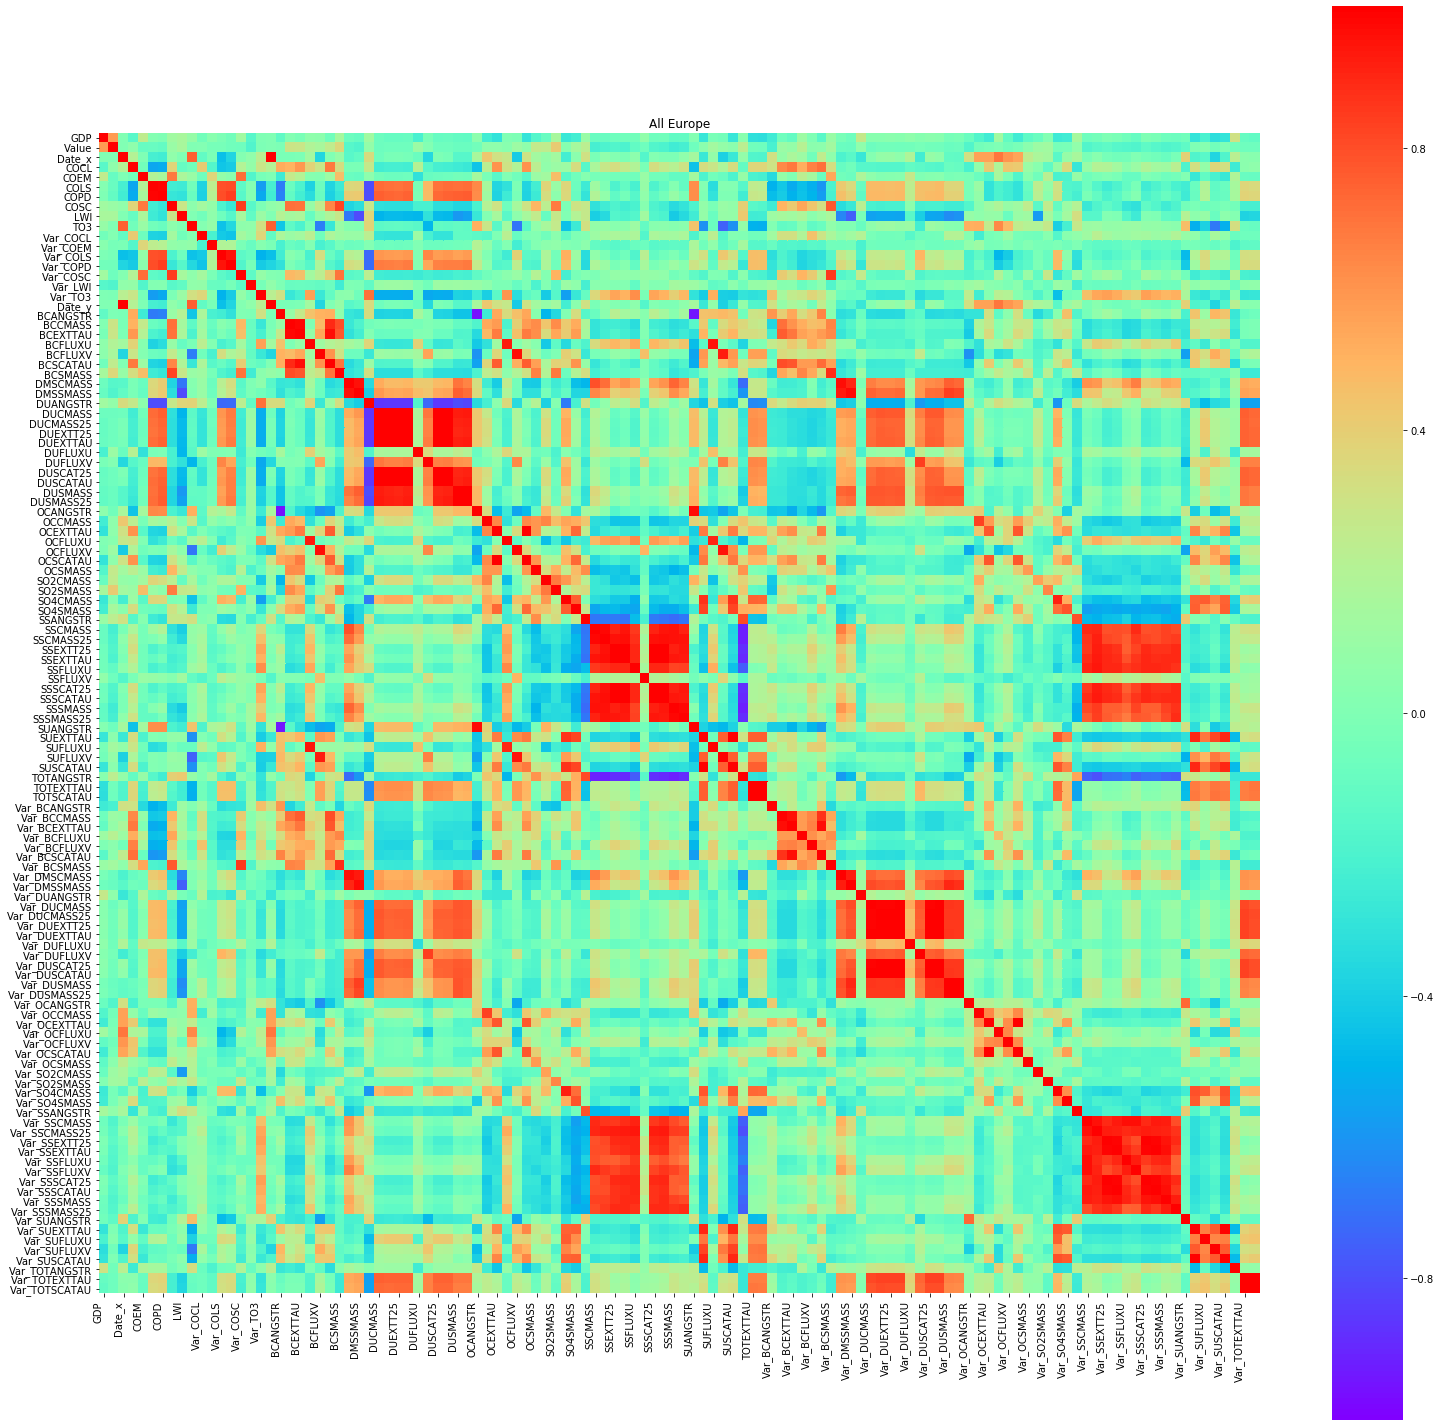

In [97]:
corr = so2_co2_energy_coal_df.corr()
plt.figure()
fig, ax = plt.subplots(1,1,figsize=(26,26))

ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap="rainbow",#sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=90,
    horizontalalignment='right',
    
);
plt.title('All Europe')
plt.show()

In [107]:
corr['Value'].sort_values()[0:5]

SSSMASS        -0.247909
SSCMASS        -0.224626
SSSMASS25      -0.223254
Var_BCANGSTR   -0.211632
SSSCATAU       -0.198360
Name: Value, dtype: float64

In [111]:
corr['GDP'].sort_values(ascending=False)[0:5]

GDP              1.000000
Value            0.584345
Var_TOTANGSTR    0.308531
Var_DUANGSTR     0.265781
COEM             0.247649
Name: GDP, dtype: float64